# Building a Convolutional Neural Network

In this section of the code, I will try to focus on the concept procedure skill connection with

In [17]:
# Importing necessary modules via programming conventions
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

# Data Loading and preprocessing 

In [18]:
# Loading the fashion mnist data from the tensorflow library
#instantiating the data class
mnist= tf.keras.datasets.fashion_mnist

In [19]:
#Splitting the data into train and test data using the load_data() method
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [20]:
#Checking the a single image shape and size
X_train[0].shape

(28, 28)

In [21]:
X_train.shape

(60000, 28, 28)

Guess the shape (28,28) means its a greyscale image

# Visualizing the image 

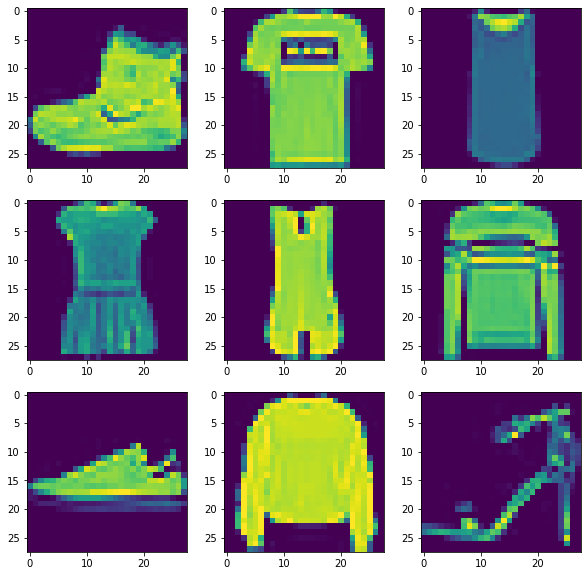

In [22]:
# i used subplots to try and get the first 8 images out and see what the were
# I could have used a for loop but I just wanted some good practice with my plotting.
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(X_train[0])
plt.subplot(3,3,2)
plt.imshow(X_train[1])
plt.subplot(3,3,3)
plt.imshow(X_train[2])
plt.subplot(3,3,4)
plt.imshow(X_train[3])
plt.subplot(3,3,5)
plt.imshow(X_train[4])
plt.subplot(3,3,6)
plt.imshow(X_train[5])
plt.subplot(3,3,7)
plt.imshow(X_train[6])
plt.subplot(3,3,8)
plt.imshow(X_train[7])
plt.subplot(3,3,9)
plt.imshow(X_train[8])





# Building the model 

This is where I will try to use my intuition and knowledge I have learnt from Andrew to build a CNN

In [23]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

1. As from Andrew, with the classic structure of the LeNet-5 a conv layer is built first before a pooling layer
2. Filter size is usually an arbitrary number and filter shape is usually 3x3 which changes the shape of the image using the formula {n-f+1 x n-f+1}
3. A non-linearity is applied before it is transformed with biases added before passed into the pooling layer
4. Two types of pooling layers are available. Max pooling hence importing MaxPooling2D which is great for feature detection and average pooling which is great for image reduction but width and size is still reduced anyway in the pooling layer.

In [24]:
# building the network
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    Flatten(),# unrolling the images into a 1D vector
    Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    Dense(10,activation='softmax')
    
])

In [25]:
optimizer= Adam()
loss='sparse_categorical_crossentropy'
accuracy='accuracy'

In [26]:
model.summary() #checking the number of parameters in the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                      

In [27]:
model.compile(optimizer=optimizer,loss=loss, metrics=[accuracy])

In [28]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.3837 - accuracy: 0.8619
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.2663 - accuracy: 0.9017
Epoch 3/5
938/938 [==============================] - 36s 38ms/step - loss: 0.2300 - accuracy: 0.9151
Epoch 4/5
938/938 [==============================] - 37s 39ms/step - loss: 0.2023 - accuracy: 0.9258
Epoch 5/5
938/938 [==============================] - 37s 40ms/step - loss: 0.1790 - accuracy: 0.9337


In [29]:
train_accuracy=model.evaluate(X_train,y_train)
test_accuracy=model.evaluate(X_test,y_test) # Evaluating test accuracy

313/313 [==============================] - 3s 7ms/step - loss: 0.2694 - accuracy: 0.9021


In [30]:
print(f"The train accuracy is {train_accuracy[1]*100}% \nThe test accuracy is {test_accuracy[1]*100} %")

The train accuracy is 93.79500150680542% 
The test accuracy is 90.21000266075134 %


The reason why batch normalization was applied first here was due to my decision of the earlier model doing substantially well. Thus using the idea of Andrews Orthogonalization where I try one thing and see how that affects the model and pivot from there.

# The end.
This time the accuracy improved upon the addition of batch normalization layer which normalizes the activation matrix that comes out of a layer and then fed into the next layer. This helps in restricting gradient changes so much to deal with such problems such as vanishing and exploding gradient. As compared the accuracy improved here.
